# Programación declarativa @ URJC
# Programación funcional
## Curso 25-26, convocatoria ordinaria (27 de octubre de 2025)
## Campus de Vicálvaro

La duración del examen es de 1h:30m.

# Preámbulo

In [ ]:
import $ivy.`org.scalatest::scalatest:3.2.16`
import org.scalatest.{Filter => _, _}, flatspec._, matchers._

### Algunas definiciones de tipos y funciones auxiliares

In [ ]:
object Signatures:
    abstract class List[A]:
        
        // Common HOFs
        def foldRight[B](nil: B)(cons: (A, B) => B): B
        def foldLeft[B](initial: B)(update: (B, A) => B): B
        def map[B](f: A => B): List[B]
        def flatMap[B](f: A => List[B]): List[B]
        def filter(f: A => Boolean): List[A]
        def forall(pred: A => Boolean): Boolean
        def exists(pred: A => Boolean): Boolean
         
        // Splits this list into a prefix/suffix pair at a given position.
        def splitAt(i: Int): Boolean 

        // Returns new list with the elements in reversed order
        def reverse: List[A]

        // A copy of this sequence with an element inserted at the end.
        def appended(a: A): List[A]

In [ ]:
// type Tree[A] = 1 + Tree[A] * A * Tree[A]

enum Tree[A]:
    case Empty()
    case Node(left: Tree[A], root: A, right: Tree[A])

object Tree:
    
    def void[A]: Tree[A] = 
        Empty()
    
    def leaf[A](a: A): Node[A] = 
        Node(Empty(), a, Empty())
    
    def right[A](a: A, tree: Tree[A]): Node[A] = 
        Node(Empty(), a, tree)
    
    def left[A](tree: Tree[A], a: A): Node[A] = 
        Node(tree, a, Empty())
    
    def node[A](left: Tree[A], a: A, right: Tree[A]): Node[A] = 
        Node(left, a, right)

import Tree._

### Definiciones auxiliares sobre la correspondencia Curry-Howard y Tipos Algebraicos de Datos

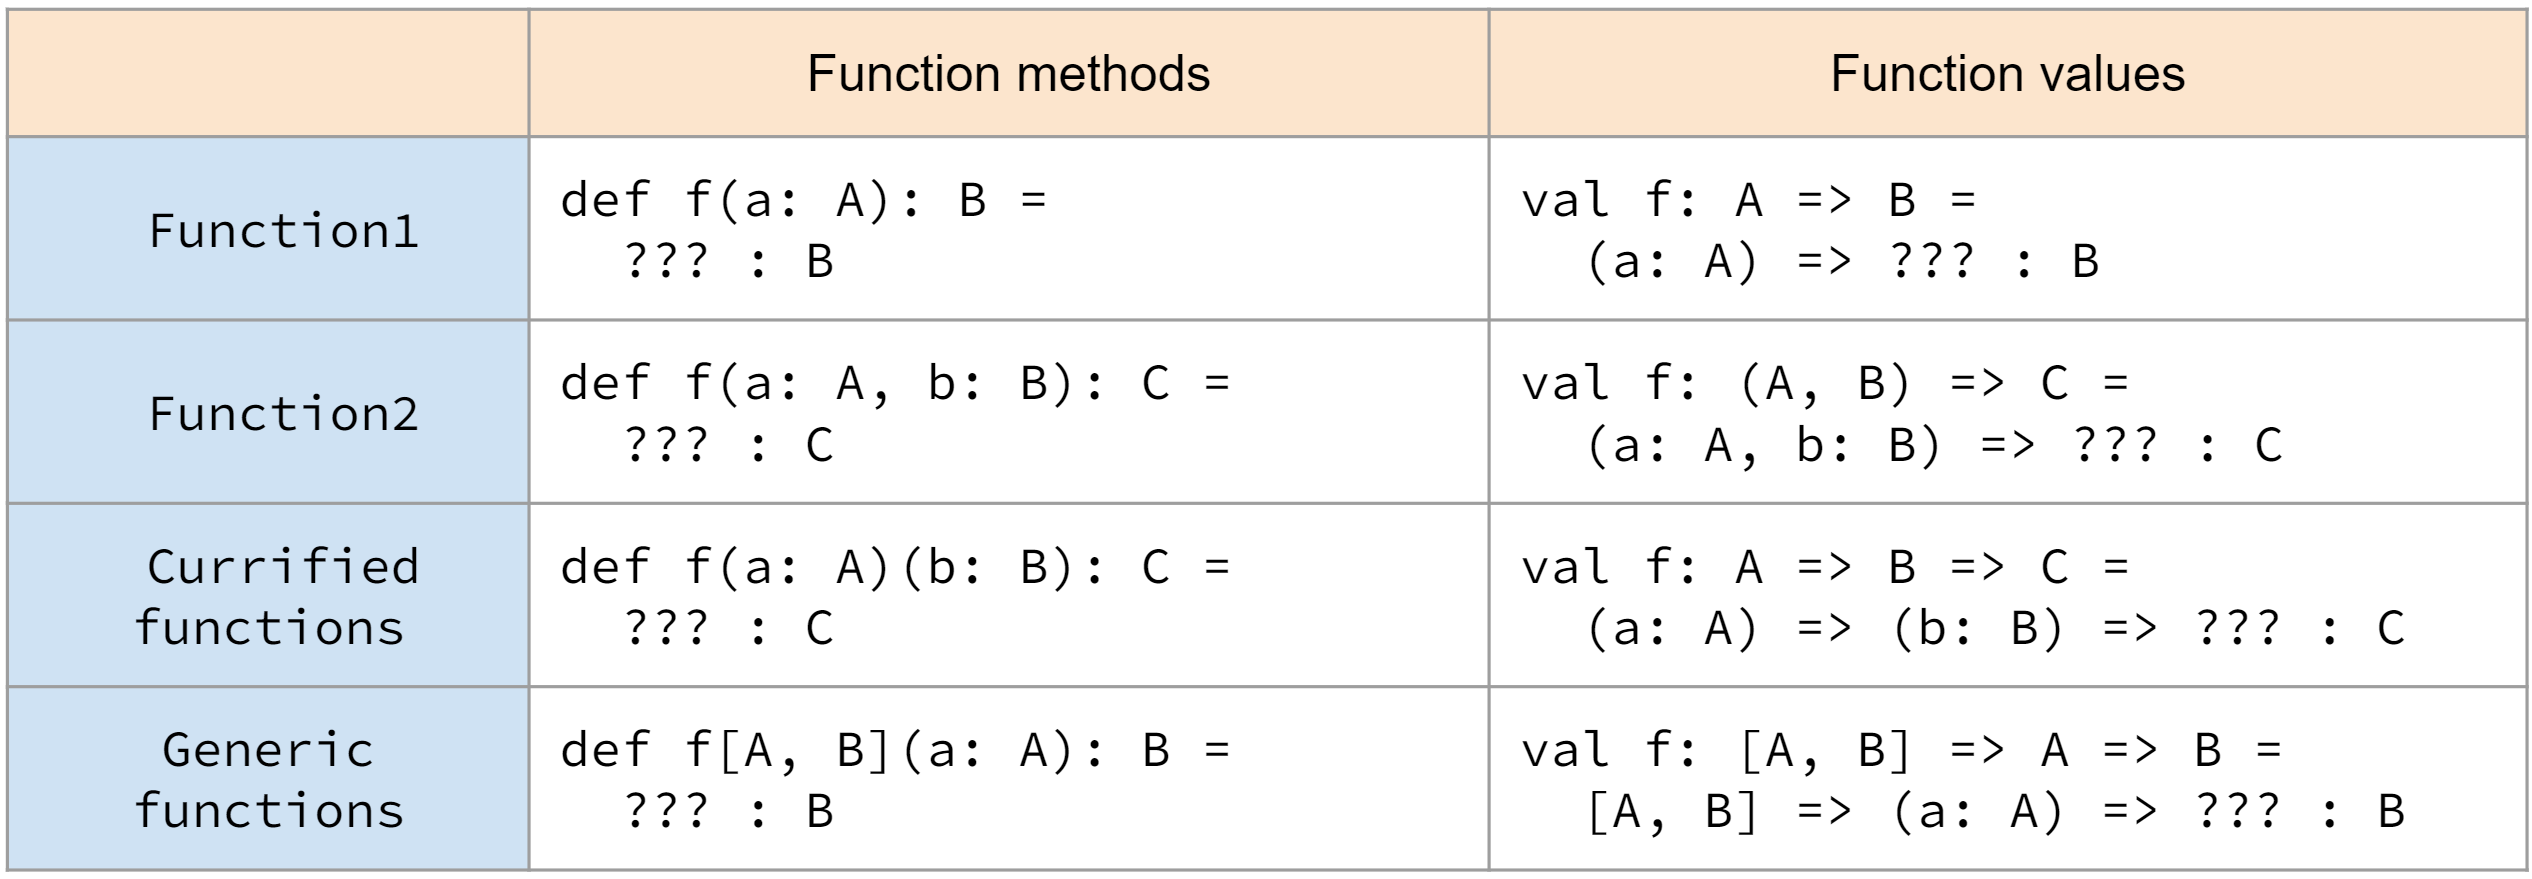

In [ ]:
trait Isomorphic[A, B]:
    
    def from(a: A): B
    
    def to(b: B): A
    
    // equality 
    
    def equalA(a1: A, a2: A): Boolean = 
        a1 == a2
    
    def equalB(b1: B, b2: B): Boolean =
        b1 == b2
    
    // Bijection laws
    
    def law1(a: A): Boolean = 
        equalA(to(from(a)), a)
    
    def law2(b: B): Boolean = 
        equalB(from(to(b)), b)

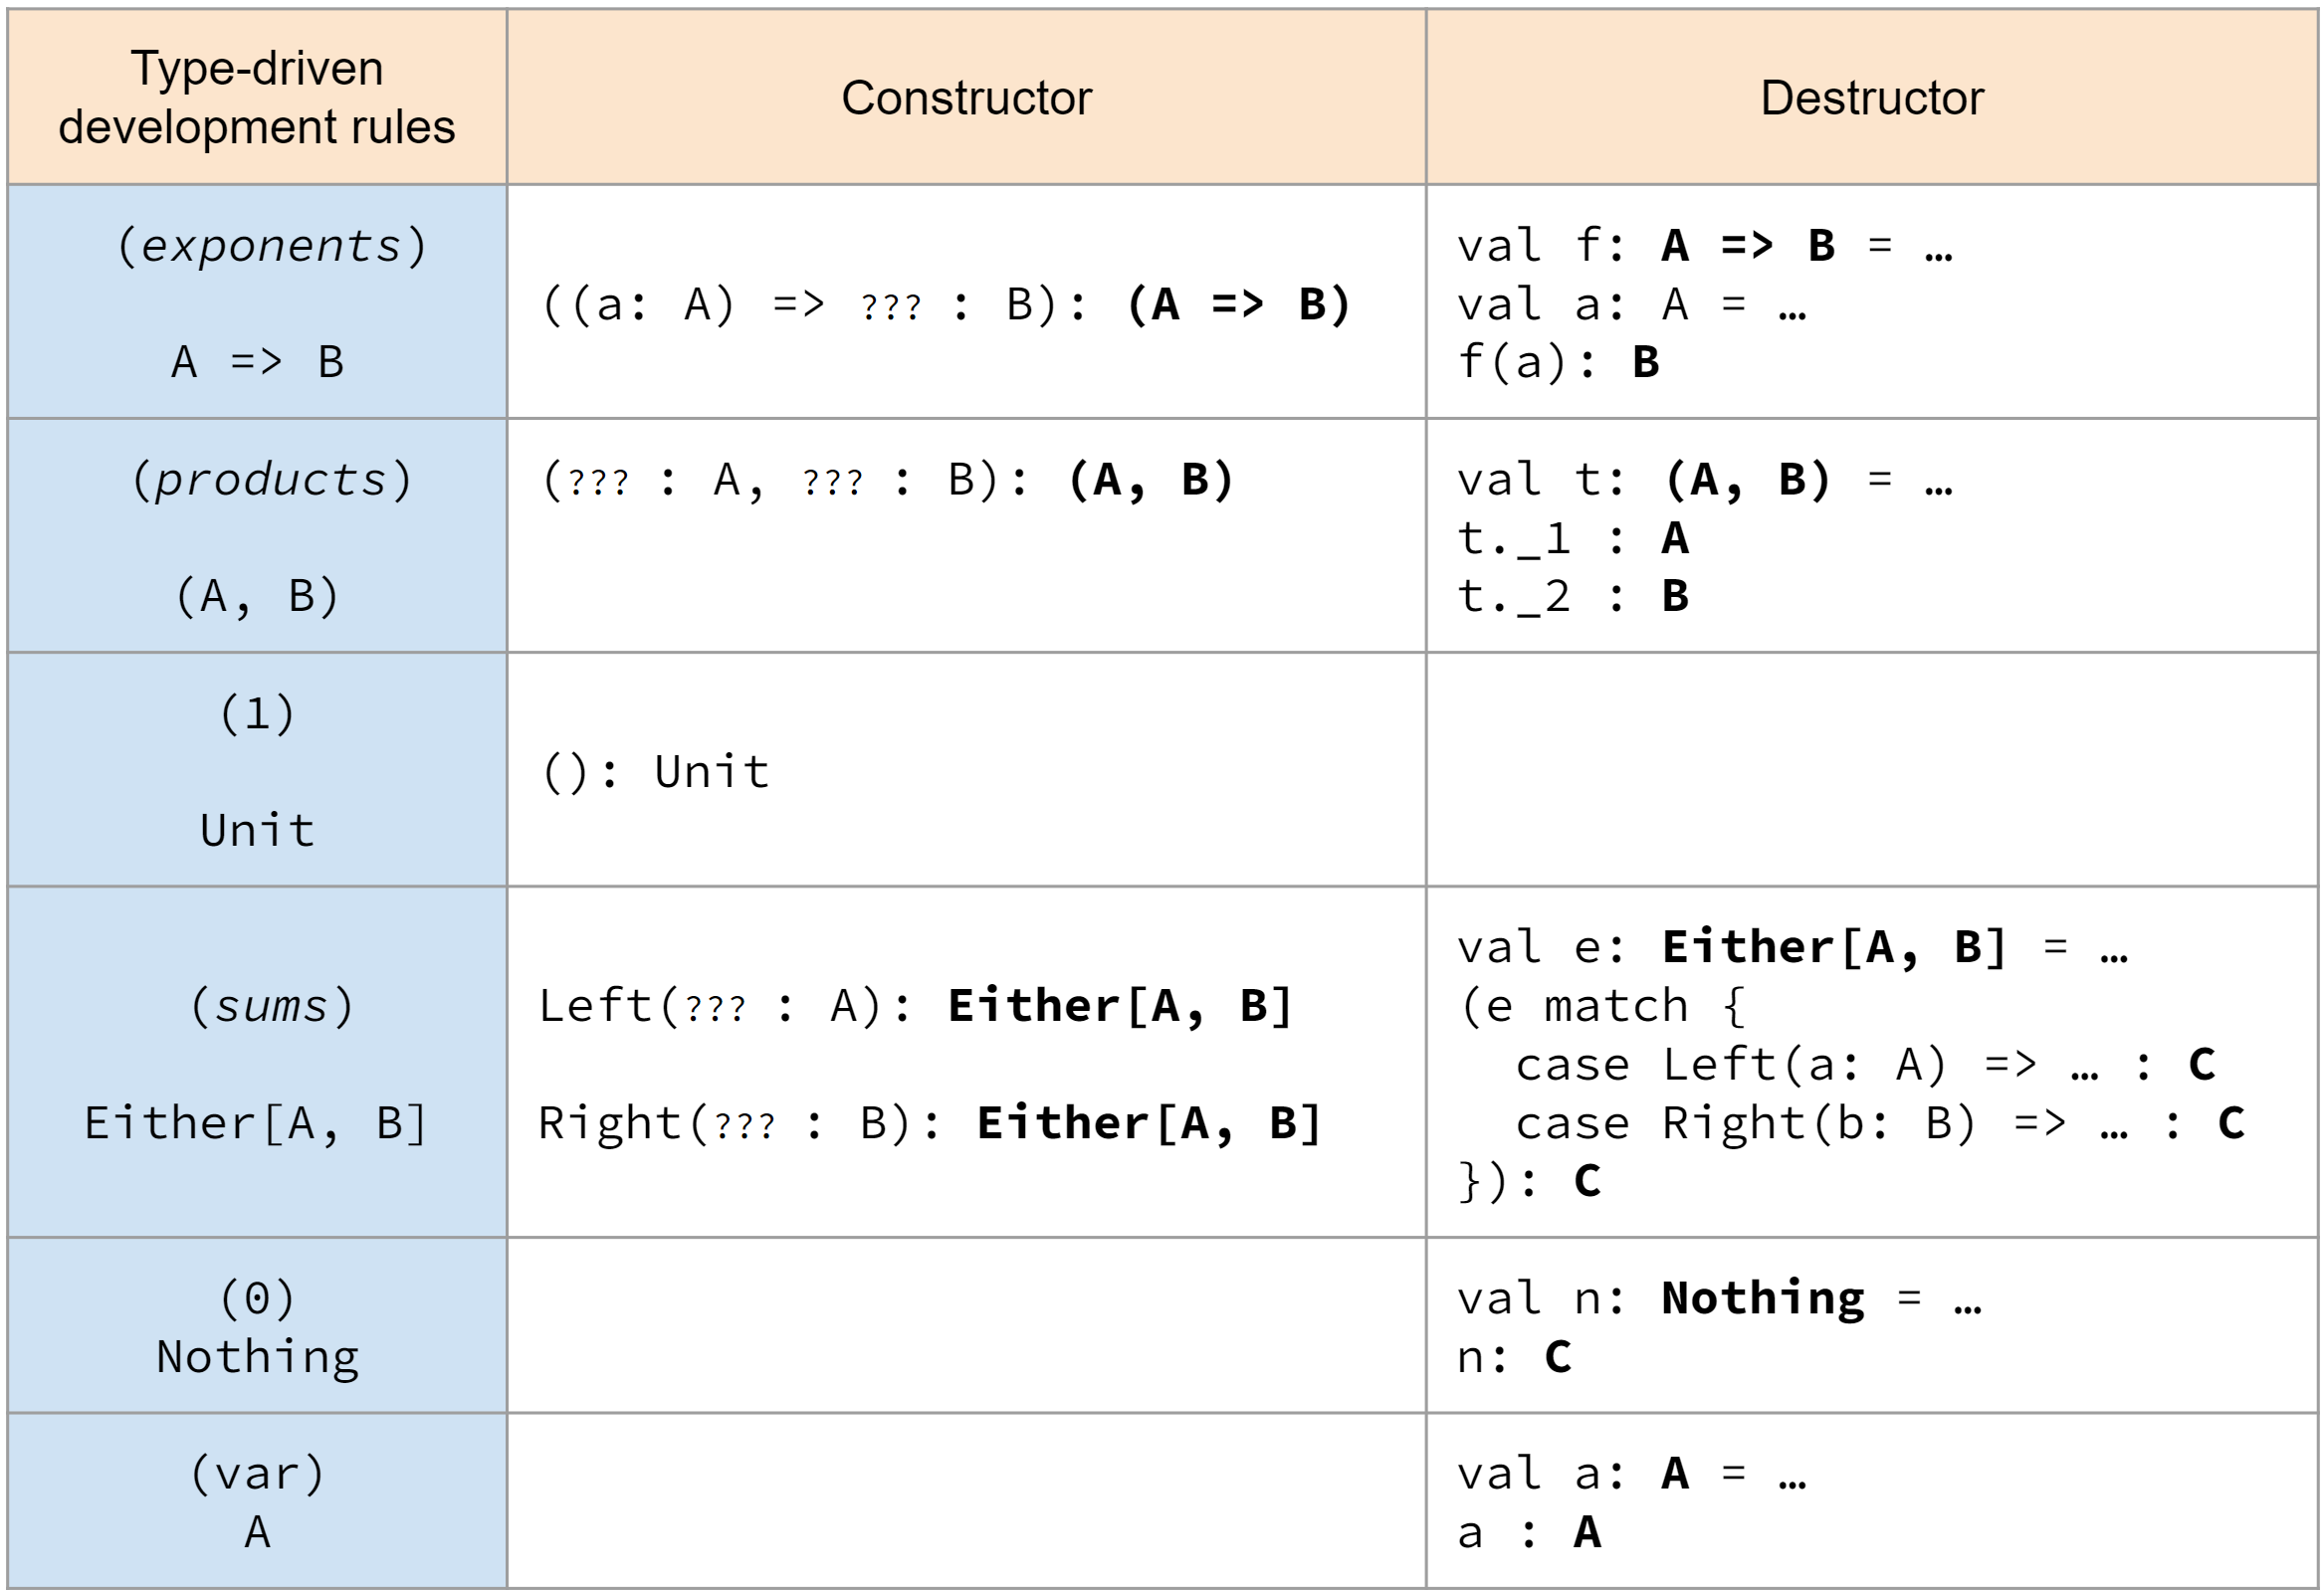

In [ ]:
type Not[P] = P => Nothing
type <=>[P, Q] = (P => Q, Q => P)

In [ ]:
trait ExcludedMiddle: 
    def apply[P]: Either[P, Not[P]]

In [ ]:
trait DoubleNegation:
    def apply[P]: Not[Not[P]] => P

# Ejercicio 1 (2 puntos)

#### a) (1 punto)

Utiliza la correspondencia de Curry-Howard para demostrar la siguiente tautología de la lógica proposicional intuicionista:

$ \vdash \neg p \vee \neg q \rightarrow \neg(p \wedge q)$

In [ ]:
// IMPLEMENTA TU RESPUESTA 


#### b) (1 punto)

Se desea utilizar la correspondencia de Curry-Howard para demostrar la validez de la siguiente tautología de la lógica clásica proposicional: 

$ \vdash (a \rightarrow b) \rightarrow \neg a \vee b $

Para ello, utiliza como premisa adicional la ley del tercio excluso aplicada a la proposición $b$.

In [ ]:
// IMPLEMENTA TU RESPUESTA 


# Ejercicio 2 (2 puntos)

Demuestra el isomorfismo entre los tipos de datos `Either[(B, Either[A, C]), Either[A, C]]` y `(Option[B], Either[C, A])`, para cualesquiera `A`, `B` y `C`, de las dos formas siguientes:  

#### a) (0.5 puntos)

Utilizando la equivalencia entre tipos algebraicos de datos y las operaciones aritméticas. 

// ESCRIBE TU RESPUESTA 


#### b) (1.5 puntos)

Implementando una biyección entre ambos tipos de datos mediante una instanciación del trait `Isomorphic`. 

In [ ]:
// IMPLEMENTA TU RESPUESTA 


# Ejercicio 3 (3 puntos)

La función `split` transforma una lista de valores de tipo `A` o `B` en un par de listas, estando la primera formada por todas las `A`s y la segunda por todas las `B`s. El comportamiento de la función se ilustra con los siguientes casos de prueba: 

In [ ]:
class TestSplit(split: List[Either[Int, Char]] => (List[Int], List[Char])) 
extends AnyFlatSpec with should.Matchers:
    
    "split" should "work" in:
        split(List()) shouldBe (List(), List())
        split(List(Right('a'), Right('b'), Right('c'), Right('d'))) shouldBe 
            (List(), List('a', 'b', 'c', 'd'))
        split(List(Right('a'), Left(1), Right('c'), Left(2))) shouldBe 
            (List(1, 2), List('a', 'c'))
        split(List(Left(1), Left(2))) shouldBe 
            (List(1, 2), List())

#### a) (1,5 puntos)

Implementa la función `split` mediante recursión (no final).

In [ ]:
// IMPLEMENTA TU RESPUESTA 


In [ ]:
run(TestSplit(split))

#### b) (1,5 puntos)

Implementa la función `split` mediante la función `foldRight`.

In [ ]:
// IMPLEMENTA TU RESPUESTA 


In [ ]:
run(TestSplit(split))

# Ejercicio 4 (3 puntos)

Considérense las siguientes funciones `add1`, `concat` y `not` basadas en un mismo patrón de diseño: 

In [ ]:
def add1(t: (Int, String)): (Int, String) = 
    (t._1+1, t._2)

In [ ]:
def not(t: (Boolean, Char)): (Boolean, Char) = 
    (!t._1, t._2)

In [ ]:
def concat(s: String): ((String, Float)) => (String, Float) = 
    (t: (String, Float)) => (t._1+s, t._2)

En todas estas funciones, se aplica una determinada función al primer componente de la tupla de entrada, mientras que el segundo componente mantiene su valor.

#### a) (1,5 puntos)

Implementa una función de orden superior denominada `map_1` que encapsule el patrón de diseño utilizado en las funciones `add1`, `concat` y `not`. 

In [ ]:
// IMPLEMENTA TU RESPUESTA 


#### b) (1,5 puntos)

Implementa de una manera más modular las funciones `add1`, `concat` y `not` mediante la función `map_1`.

In [ ]:
def not(e: (Boolean, Char)): (Boolean, Char) = 
    ???

In [ ]:
def add1(e: (Int, String)): (Int, String) = 
    ???

In [ ]:
def concat(s: String): ((String, Float)) => (String, Float) = 
    ???